# 1. Import key libraries

In [1]:
import torch
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid


from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.__version__,device

('2.7.1+cu128', 'cuda')

In [2]:
root_dir = Path('TIR1Data')
assert root_dir.exists()

In [3]:
def get_tir_values(root_dir):
  vals = []
  for path in tqdm(list(root_dir.glob('*'))):
    vals.append(np.load(path))

  return vals

In [4]:
values = get_tir_values(root_dir)

100%|██████████| 1511/1511 [00:32<00:00, 45.99it/s]


In [5]:
values[0].shape

(1616, 1737)

In [ ]:
values[0]

array([[266.08545, 265.87497, 267.12857, ..., 288.62576, 288.47162,
        288.16238],
       [265.87497, 265.2396 , 266.92117, ..., 288.93307, 288.62576,
        288.31717],
       [265.87497, 265.2396 , 266.50458, ..., 288.93307, 288.62576,
        288.31717],
       ...,
       [293.54102, 293.39673, 293.39673, ..., 286.43808, 286.75458,
        286.2793 ],
       [293.685  , 293.54102, 293.25217, ..., 282.6974 , 284.51007,
        285.64084],
       [293.39673, 293.25217, 293.10736, ..., 280.83896, 281.35046,
        283.85605]], shape=(1616, 1737), dtype=float32)

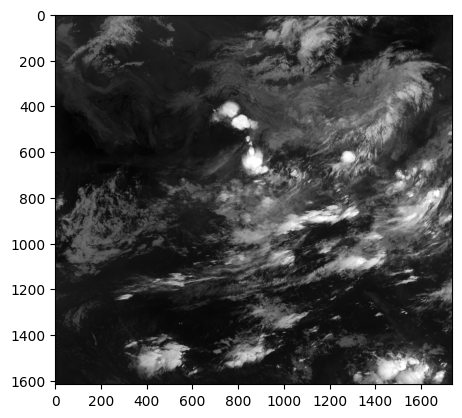

In [7]:
plt.imshow(values[0],cmap = 'binary')
plt.show()

In [8]:
from matplotlib.animation import FuncAnimation


In [18]:
def generate_animation(total_frames, interval=100, cmap='binary'):
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation

    fig, ax = plt.subplots()
    im = ax.imshow(total_frames[0], cmap=cmap, animated=True)

    def update(i):
        im.set_array(total_frames[i])
        return [im]

    ani = FuncAnimation(
        fig, update, frames=len(total_frames),
        interval=interval, blit=True, repeat=True
    )

    plt.axis("off")
    plt.tight_layout()
    plt.show()

    return ani  # Keep a reference alive!


In [19]:
%matplotlib notebook
ani = generate_animation(values[:500])

<IPython.core.display.Javascript object>

In [21]:
%matplotlib notebook
ani = generate_animation(values[:500])

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
import numpy as np

def generate_animation(total_frames, interval=100, cmap='inferno'):
    fig, ax = plt.subplots()
    im = ax.imshow(total_frames[0], cmap=cmap, animated=True)

    def update(i):
        im.set_array(total_frames[i])
        return [im]

    ani = FuncAnimation(fig, update, frames=len(total_frames), interval=interval, blit=True)
    return ani

ani = generate_animation(values[:700])

# Save to GIF
ani.save("animation.gif", writer=PillowWriter(fps=10))

# Display in Colab
from IPython.display import Image
Image("animation.gif")


<IPython.core.display.Javascript object>